**Arie Tuckman and Julia Renner, PROJECT TITLE, GITHUB.IO LINK**

*Collaboration Plan:*

We have decided that for our partnership, we will begin by mainly working together in person to ensure that our communication is as seamless as possible as we get our project off the ground. Ideally, we will meet once or twice a week to collaborate and also continue to work on our own delegated tasks during our own time, keeping each other updated on all progress of course. Our main mode of consistent contact is text messaging, along with a google document where we have begun to keep track of different tasks that either are or need to be completed. We will primarily be completing this project in a shared Google Colaboratory notebook.

*Potential Data Sets:*

https://github.com/fivethirtyeight/data/blob/master/congress-age/congress-terms.csv

This data set provides brief age and background information of every member of the United States Congress who served from January 1947 to February 2014. This data set is from the Five-Thirty-Eight data. I would like this data set to answer which states tend to have the oldest members of Congress.
One interesting stat from this dataset is that the average age of Congress members from January 1947 to February 2014 is just over 53 years old.

https://github.com/fivethirtyeight/data/tree/master/births

This data set contains a count of how many people were born every day from 2000 to 2014. It includes the year, month, day of the week, and total number of births for each day. We could use this data set to find out what year in this range had the most total births, or even what day on its own had the most births. It would be interesting to see if the day of the most births was during the year of the most births.
One interesting stat from this dataset is that the day where the most babies were born between the years 2000 and 2014 was Tuesday September 9th, 2009 with 16,081 total births.

https://github.com/fivethirtyeight/data/blob/master/steak-survey/steak-risk-survey.csv

This data set details a survey conducted that asked people a multitude of questions both about risk taking such as if they ever drink alcohol or have been skydiving, and also if they eat steak and how they like it cooked. Information on each individual's gender, age, and location is also included. I would ideally use this dataset to analyze if there seems to be any correlation between different genders, age groups, or geographic locations and the answers to these questions. It would also be interesting to find out if people who do eat steak are more or less likely to take risks, or if the answers seem entirely unrelated.



*Implementation of Congress Age Dataset:*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "/content/congress-terms.csv"
df = pd.read_csv(path) # reading in the data set

One interesting stat from this dataset is that the average age of Congress members from January 1947 to February 2014 is just over 53 years old.

In [14]:
print(df['age'].mean()) # acquiring the average value of Congress members' ages.

53.31373222430909


Text(0, 0.5, 'Frequency')

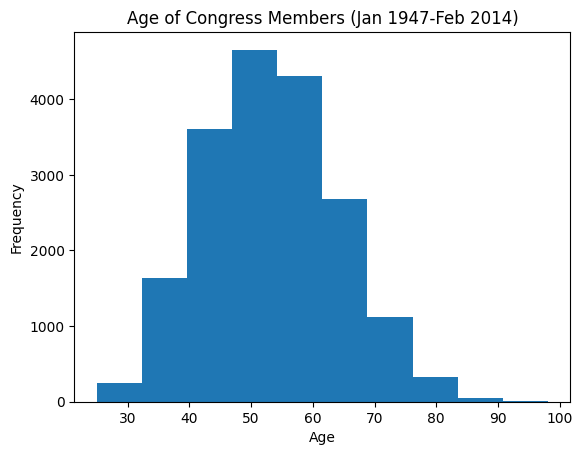

In [15]:
df["age"].plot.hist() # creating a histogram to show how many members are each age
plt.title("Age of Congress Members (Jan 1947-Feb 2014)") # setting title
plt.xlabel("Age") # labeling x axis
plt.ylabel("Frequency") # labeling y axis